<a href="https://colab.research.google.com/github/Monique14041980/.ipython/blob/main/Churn_Model_with_deep_learning_PyTorch_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Modelo de Churn com deep learning** 🔄

**Você já escutou sobre modelos de Churn?**

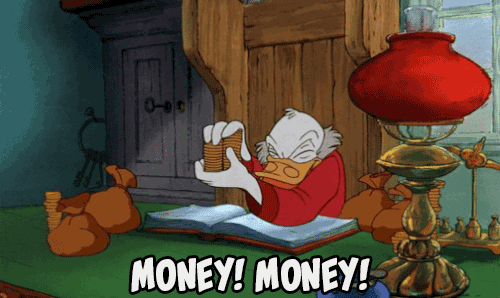

Um modelo de churn é uma **ferramenta analítica** que visa **prever e entender a taxa de churn em um negócio** (taxa de perda de clientes ou usuários ao longo do tempo). Um modelo de churn utiliza dados históricos sobre clientes e diversas variáveis para identificar padrões que possam indicar a **probabilidade de um cliente deixar de usar um serviço ou produto**. Belo cenário para aplicar aprendizado de máquina, não é mesmo?

**Sobre a base de dados:**🎲

Link da base de dados original: https://www.kaggle.com/datasets/shrutimechlearn/churn-modelling



# Importando a base de dados e conhecendo os dados.

Primeiro passo é carregar os dados e conhecer as variáveis do seu projeto. Neste caso, os dados estão neste link https://www.kaggle.com/datasets/shrutimechlearn/churn-modelling?select=Churn_Modelling.csv em um formato csv. Vamos realizar download desta base e começar a trabalhar!

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
df = pd.read_csv('Churn_Modelling.csv', sep=',')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
df.shape # bastante dados!

(10000, 14)

Perceba que aqui temos muitas colunas interessantes! Para facilitar nossa análise, vamos deixar o nome destas colunas em português.

In [ ]:
# Criando um dicionário de dados para as novas colunas
novo_nome_colunas = {'RowNumber': 'NumeroLinha',
                     'CustomerId': 'IDCliente',
                     'Surname': 'Nome',
                     'CreditScore':'ScoreDeCredito',
                     'Geography':'Pais',
                     'Gender':'Genero',
                     'Age':'Idade',
                     'Tenure':'NumeroPosses',
                     'Balance':'Equilibrio',
                     'NumOfProducts':'NumeroDeProdutos',
                     'HasCrCard':'PossuiCartaoCredito',
                     'IsActiveMember':'MembroAtivo',
                     'EstimatedSalary':'SalarioEstimado',
                     'Exited':'Saida'}

# Renomear as colunas usando o método 'rename'
df = df.rename(columns=novo_nome_colunas)
df.head()

,NumeroLinha,IDCliente,Nome,ScoreDeCredito,Pais,Genero,Idade,NumeroPosses,Equilibrio,NumeroDeProdutos,PossuiCartaoCredito,MembroAtivo,SalarioEstimado,Saida
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
df = df.drop(['NumeroLinha', 'IDCliente', 'Nome', 'Genero'], axis=1)

In [ ]:
df.head()

,ScoreDeCredito,Pais,Idade,NumeroPosses,Equilibrio,NumeroDeProdutos,PossuiCartaoCredito,MembroAtivo,SalarioEstimado,Saida
0,619,France,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,41,1,83807.86,1,0,1,112542.58,0
2,502,France,42,8,159660.80,3,1,0,113931.57,1
3,699,France,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,43,2,125510.82,1,1,1,79084.10,0


# Separando os dados em treino e teste 📦✂️

In [ ]:
set(df['Saida'])

{0, 1}

In [ ]:
round(df['Saida'].value_counts(normalize = True)*100,2)

Saida
0    79.63
1    20.37
Name: proportion, dtype: float64

OK, temos um desequilíbrio de classe 🤔 O que podemos fazer na prática?

In [ ]:
from sklearn.model_selection import train_test_split

SEED = 42

train_df, test_df = train_test_split(df, test_size=0.2, random_state=SEED)

train_df_copy = train_df.copy()
test_df_copy = test_df.copy()

In [ ]:
round(train_df['Saida'].value_counts(normalize = True)*100,2)

Saida
0    79.45
1    20.55
Name: proportion, dtype: float64

In [ ]:
round(test_df['Saida'].value_counts(normalize = True)*100,2)

Saida
0    80.35
1    19.65
Name: proportion, dtype: float64

## Trataando o desequilibrio de classe

In [ ]:
from sklearn.utils import resample

class DataUndersampler:
    def __init__(self):
        pass

    def transform(self, df):
        """
        Transforma os dados de entrada aplicando a técnica de undersampling na classe majoritária.

        Parâmetros:
        - df: O DataFrame de entrada.

        Retorna:
        - O DataFrame com undersampling aplicado, se a coluna 'Saida' estiver presente.
          Caso contrário, retorna o DataFrame original sem alterações.
        """
        if 'Saida' in df.columns:
            # Identifica a classe majoritária e minoritária
            majority_class = df['Saida'].value_counts().idxmax()
            minority_class = df['Saida'].value_counts().idxmin()

            # Divide o DataFrame em classes separadas
            df_majority = df[df['Saida'] == majority_class]
            df_minority = df[df['Saida'] == minority_class]

            # Subamostra a classe majoritária para ter o mesmo tamanho da classe minoritária
            df_majority_downsampled = resample(df_majority,
                                               replace=False,
                                               n_samples=df_minority.shape[0],
                                               random_state=123)

            # Combina as classes minoritária e majoritária subamostrada
            df_balanced = pd.concat([df_majority_downsampled, df_minority])

            return df_balanced
        else:
            # Se a coluna 'Saida' não estiver presente, imprime uma mensagem e retorna o DataFrame original
            print("A coluna 'Saida' não está no DataFrame")
            return df

undersampler = DataUndersampler()
train_df = undersampler.transform(train_df)


In [ ]:
round(train_df['Saida'].value_counts(normalize = True)*100,2)

Saida
0    50.0
1    50.0
Name: proportion, dtype: float64

In [ ]:
train_df.shape

(3288, 10)

In [ ]:
test_df.shape

(2000, 10)

In [ ]:
train_df

,ScoreDeCredito,Pais,Idade,NumeroPosses,Equilibrio,NumeroDeProdutos,PossuiCartaoCredito,MembroAtivo,SalarioEstimado,Saida
6003,708,Spain,19,7,112615.86,1,1,1,4491.77,0
1422,696,Spain,41,9,127523.75,1,0,1,191417.42,0
1089,628,France,51,3,123981.31,2,1,1,40546.15,0
1868,656,France,36,8,97786.08,2,0,1,21478.36,0
8867,457,France,38,7,164496.99,1,1,1,163327.27,0
...,...,...,...,...,...,...,...,...,...,...
4555,688,Spain,35,6,0.00,1,1,0,25488.43,1
769,531,France,63,1,114715.71,1,0,1,24506.95,1
1685,613,Germany,20,0,117356.19,1,0,0,113557.70,1
5390,735,France,38,1,0.00,3,0,0,92220.12,1


# Criando a pipeline de tratamento dos dados 🛠️

*O que seria pipeline?*

Podemos definir a pipeline como uma **sequência de de processos ou etapas encadeadas que são usadas para preparar, treinar e avaliar modelos de machine learning/ deep learning**. Um pipeline é uma abordagem organizada que facilita o gerenciamento de todas as etapas necessárias na construção e implementação de um modelo de aprendizado de máquina.

A ideia é utilizarmo a biblioteca do scikit-learn para automarizar estes fluxos de tratamento de dados.

Vamos trabalhar com algumas classes do scikit-learn, como:

* **BaseEstimator:** BaseEstimator é uma classe base do scikit-learn que fornece a funcionalidade básica para todos os estimadores (modelos) do scikit-learn. Define métodos como **fit()** e **predict()**. Os modelos de machine learning personalizados geralmente herdam dessa classe para garantir uma interface consistente.


* **TransformerMixin:** TransformerMixin é uma classe do scikit-learn que fornece funcionalidades adicionais para **transformadores** (pré-processadores de dados). Adiciona métodos como fit_transform() que combina as etapas de ajuste (fit()) e transformação (transform()) em um único método.


* **MinMaxScaler:** MinMaxScaler é uma classe do scikit-learn que realiza a **normalização** de características, escalando-as para um intervalo específico, geralmente entre **0 e 1**. Isso é útil para algoritmos sensíveis à escala das características.


* **LabelEncoder:** LabelEncoder, do scikit-learn, é usado para **codificar rótulos de classes em números inteiros**. É frequentemente usado quando se trabalha com algoritmos de aprendizado supervisionado que requerem rótulos numéricos.



In [ ]:
from sklearn.preprocessing import MinMaxScaler, LabelEncoder

def normalize_and_encode(train_df, test_df, numeric_cols=[], categorical_cols=[]):
    """
    Normaliza colunas numéricas e aplica Label Encoding em colunas categóricas de DataFrames de treino e teste.

    :param train_df: DataFrame de treino.
    :param test_df: DataFrame de teste.
    :param numeric_cols: Lista de colunas numéricas a serem normalizadas.
    :param categorical_cols: Lista de colunas categóricas a serem transformadas com Label Encoding.
    :return: DataFrames de treino e teste transformados.
    """
    # Normalização
    if numeric_cols:
        scaler = MinMaxScaler()
        train_df[numeric_cols] = scaler.fit_transform(train_df[numeric_cols])
        test_df[numeric_cols] = scaler.transform(test_df[numeric_cols])

    # Label Encoding
    if categorical_cols:
        for col in categorical_cols:
            encoder = LabelEncoder()
            # Fit no dataframe de treino
            train_df[col] = encoder.fit_transform(train_df[col])
            # Transform no dataframe de teste com os mesmos valores
            test_df[col] = encoder.transform(test_df[col])

    return train_df, test_df

categorical_columns = ['Pais']
numeric_columns= ['ScoreDeCredito', 'Idade', 'NumeroPosses', 'Equilibrio','NumeroDeProdutos', 'SalarioEstimado' ]

train_data_transformed, test_data_transformed = normalize_and_encode(train_df, test_df, numeric_columns, categorical_columns)

In [ ]:
train_data_transformed

,ScoreDeCredito,Pais,Idade,NumeroPosses,Equilibrio,NumeroDeProdutos,PossuiCartaoCredito,MembroAtivo,SalarioEstimado,Saida
6003,0.716,2,0.015152,0.7,0.448851,0.000000,1,1,0.022022,0
1422,0.692,2,0.348485,0.9,0.508269,0.000000,0,1,0.957208,0
1089,0.556,0,0.500000,0.3,0.494150,0.333333,1,1,0.202401,0
1868,0.612,0,0.272727,0.8,0.389744,0.333333,0,1,0.107005,0
8867,0.214,0,0.303030,0.7,0.655633,0.000000,1,1,0.816673,0
...,...,...,...,...,...,...,...,...,...,...
4555,0.676,2,0.257576,0.6,0.000000,0.000000,1,0,0.127068,1
769,0.362,0,0.681818,0.1,0.457220,0.000000,0,1,0.122157,1
1685,0.526,1,0.030303,0.0,0.467744,0.000000,0,0,0.567677,1
5390,0.770,0,0.303030,0.1,0.000000,0.666667,0,0,0.460925,1


In [ ]:
test_data_transformed

,ScoreDeCredito,Pais,Idade,NumeroPosses,Equilibrio,NumeroDeProdutos,PossuiCartaoCredito,MembroAtivo,SalarioEstimado,Saida
6252,0.492,1,0.212121,0.3,0.385452,0.333333,0,0,0.208616,0
4684,0.546,0,0.378788,0.1,0.000000,0.333333,1,1,0.731883,0
1731,0.502,2,0.393939,0.4,0.000000,0.333333,1,0,0.292531,0
4742,0.312,1,0.621212,0.8,0.474902,0.333333,1,1,0.853458,0
4521,0.420,2,0.136364,0.7,0.498194,0.000000,1,1,0.573241,0
...,...,...,...,...,...,...,...,...,...,...
6412,0.504,1,0.530303,0.5,0.391668,0.000000,0,1,0.224875,1
8285,0.518,0,0.106061,1.0,0.000000,0.000000,0,1,0.549353,0
7853,0.760,0,0.439394,0.7,0.000000,0.000000,1,0,0.166515,1
1095,0.684,0,0.166667,0.4,0.000000,0.000000,1,0,0.383558,1


# Por que aplicamos as normalizações com as bases já separadas em treino e teste? 🤔
Se aplicarmos normalizações antes de dividir em conjuntos de treino e teste, podemos acabar introduzindo informações do conjunto de teste no conjunto de treino. Isso pode levar a uma avaliação otimista do desempenho do modelo, uma vez que o modelo terá visto parte dos dados de teste durante o treinamento. Este tipo de problema também é chamado de **Data Leak (vazamento de dados)**.

# Preparando a base para treino e validação do modelo 🛠️

In [ ]:
X_train, y_train = train_data_transformed.loc[:, train_data_transformed.columns != 'Saida'], train_data_transformed['Saida']
X_test, y_test= test_data_transformed.loc[:, test_data_transformed.columns != 'Saida'], test_data_transformed['Saida']

In [ ]:
X_train.shape

(3288, 9)

In [ ]:
X_test.shape

(2000, 9)

In [ ]:
y_train

6003    0
1422    0
1089    0
1868    0
8867    0
       ..
4555    1
769     1
1685    1
5390    1
860     1
Name: Saida, Length: 3288, dtype: int64

# Criando o modelo de deep learning com Pytorch

In [ ]:
import torch.nn as nn
import torch.nn.functional  as F
import torch.optim as optim

In [ ]:
# Definir a arquitetura da rede neural
class Model(nn.Module):
    def __init__(self, in_features=9, h1=98, h2=48, h3=24, output_features=1):
        super().__init__()
        self.fc1 = nn.Linear(in_features, h1)
        self.fc2 = nn.Linear(h1, h2)
        self.fc3 = nn.Linear(h2, h3)
        self.out = nn.Linear(h3, output_features)

    def forward(self, x):
        x = F.relu(self.fc1(x)) # Função de ativação
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = torch.sigmoid(self.out(x)) # função de ativação da saída (binário = sigmoid)

        return x

In [ ]:
import torch

# Configurando uma semente aleatória nos dados
torch.manual_seed(42)

# Instancianco o modelo
model = Model()

In [ ]:
# Convertendo para numpy arrays
X_train = X_train.values
X_test = X_test.values

In [ ]:
# Convertendo os valores de X para tensores
X_train = torch.FloatTensor(X_train)  # Converte os dados de treinamento para tensores do tipo FloatTensor
X_test = torch.FloatTensor(X_test)    # Converte os dados de teste para tensores do tipo FloatTensor

# Convertendo as targets para tensores
y_train_numpy = y_train.to_numpy()
y_test_numpy = y_test.to_numpy()

y_train = torch.FloatTensor(y_train_numpy).view(-1, 1)  # Converte as labels de treinamento para tensores do tipo FloatTensor e adiciona .view(-1, 1) para garantir que tenham duas dimensões (útil para cálculos posteriores)
y_test = torch.FloatTensor(y_test_numpy).view(-1, 1)    # Converte as labels de teste para tensores do tipo FloatTensor e mantém duas dimensões


In [ ]:
learning_rate = 0.001
#0.1
#0.01

# como eu vou medir minha função de custo?
criterion = nn.BCELoss() # Binary Cross Entropy Loss para classificação binária

# qual vai ser meu gradiente? lr = learning rate
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [ ]:
model.parameters

<bound method Module.parameters of Model(
  (fc1): Linear(in_features=9, out_features=98, bias=True)
  (fc2): Linear(in_features=98, out_features=48, bias=True)
  (fc3): Linear(in_features=48, out_features=24, bias=True)
  (out): Linear(in_features=24, out_features=1, bias=True)
)>

Epoch: 0, Train Loss: 0.6935718655586243, Test Loss: 0.7001863121986389, Train Acc: 0.5, Test Acc: 0.1965000033378601
Epoch: 10, Train Loss: 0.6889265179634094, Test Loss: 0.6981901526451111, Train Acc: 0.5729926824569702, Test Acc: 0.3709999918937683
Epoch: 20, Train Loss: 0.6816721558570862, Test Loss: 0.6942944526672363, Train Acc: 0.6146593689918518, Test Acc: 0.531000018119812
Epoch: 30, Train Loss: 0.6683080792427063, Test Loss: 0.6883547306060791, Train Acc: 0.6161800622940063, Test Acc: 0.5630000233650208
Epoch: 40, Train Loss: 0.6475412249565125, Test Loss: 0.6666353940963745, Train Acc: 0.6283454895019531, Test Acc: 0.5995000004768372
Epoch: 50, Train Loss: 0.6202973127365112, Test Loss: 0.6278834342956543, Train Acc: 0.6535888314247131, Test Acc: 0.6520000100135803
Epoch: 60, Train Loss: 0.5930700898170471, Test Loss: 0.5967775583267212, Train Acc: 0.6791362762451172, Test Acc: 0.6930000185966492
Epoch: 70, Train Loss: 0.5764667987823486, Test Loss: 0.580463707447052, Train 

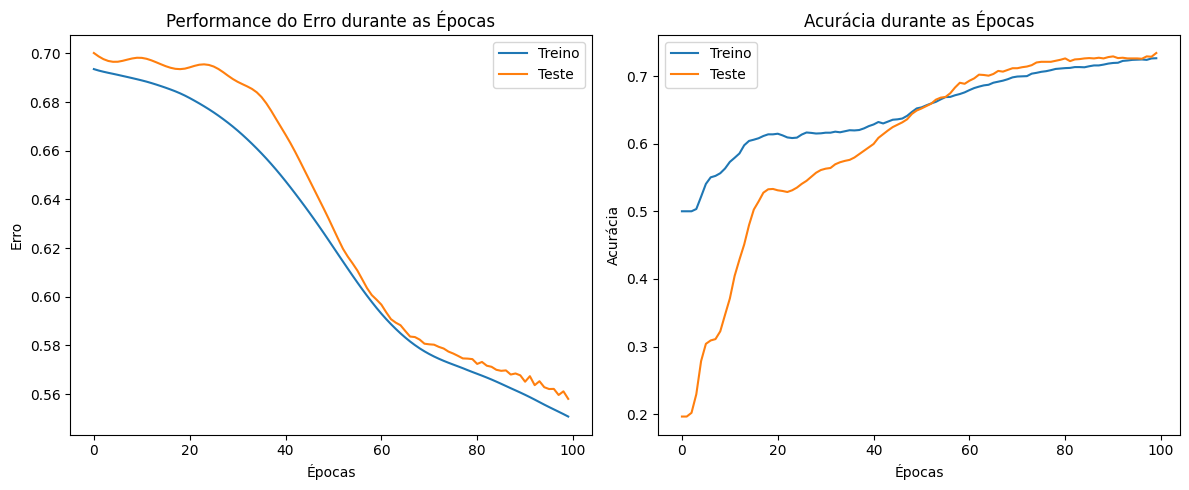

In [ ]:
# Treinamento
epochs = 100
train_losses = []        # Lista para armazenar as perdas durante o treinamento
test_losses = []         # Lista para armazenar as perdas durante o teste
train_accuracies = []    # Lista para armazenar as acurácias durante o treinamento
test_accuracies = []     # Lista para armazenar as acurácias durante o teste

# Loop para cada época de treinamento
for i in range(epochs):
    # Treino
    model.train()  # Define o modelo para o modo de treinamento
    y_pred_train = model(X_train)  # Obtém as previsões do modelo para os dados de treinamento

    loss_train = criterion(y_pred_train, y_train)  # Calcula a perda entre as previsões e os rótulos de treinamento
    optimizer.zero_grad()  # Zera os gradientes acumulados
    loss_train.backward()  # Retropropagação para calcular os gradientes
    optimizer.step()       # Atualiza os pesos do modelo com base nos gradientes calculados

    # Teste
    model.eval()  # Define o modelo para o modo de avaliação (teste)
    y_pred_test = model(X_test)  # Obtém as previsões do modelo para os dados de teste

    loss_test = criterion(y_pred_test, y_test)  # Calcula a perda entre as previsões e os rótulos de teste

    # Cálculo da acurácia
    predicted_train = (y_pred_train > 0.5).float()  # Converte as previsões para valores binários (0 ou 1)
    accuracy_train = (predicted_train == y_train).float().mean()  # Calcula a acurácia para os dados de treinamento

    predicted_test = (y_pred_test > 0.5).float()  # Converte as previsões para valores binários (0 ou 1)
    accuracy_test = (predicted_test == y_test).float().mean()  # Calcula a acurácia para os dados de teste

    # Armazena as métricas em listas para posterior análise ou visualização
    train_losses.append(loss_train.item())
    test_losses.append(loss_test.item())
    train_accuracies.append(accuracy_train.item())
    test_accuracies.append(accuracy_test.item())

    # Imprime as métricas a cada 10 épocas
    if i % 10 == 0:
        print(f'Epoch: {i}, Train Loss: {loss_train.item()}, Test Loss: {loss_test.item()}, Train Acc: {accuracy_train.item()}, Test Acc: {accuracy_test.item()}')

# Plotar gráficos
plt.figure(figsize=(12, 5))

# Gráfico de Erro
plt.subplot(1, 2, 1)
plt.plot(range(epochs), train_losses, label='Treino')
plt.plot(range(epochs), test_losses, label='Teste')
plt.title('Performance do Erro durante as Épocas')
plt.xlabel('Épocas')
plt.ylabel('Erro')
plt.legend()

# Gráfico de Acurácia
plt.subplot(1, 2, 2)
plt.plot(range(epochs), train_accuracies, label='Treino')
plt.plot(range(epochs), test_accuracies, label='Teste')
plt.title('Acurácia durante as Épocas')
plt.xlabel('Épocas')
plt.ylabel('Acurácia')
plt.legend()

plt.tight_layout()
plt.show()



In [ ]:
torch.save(model, 'model.pth')

In [ ]:
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

# Previsões do modelo
y_pred = model(X_test)

# Converter previsões para valores binários
y_pred_bin = (y_pred > 0.5).float()

# Gerar relatório de classificação
print(classification_report(y_test, y_pred_bin))


              precision    recall  f1-score   support

         0.0       0.92      0.74      0.82      1607
         1.0       0.40      0.72      0.52       393

    accuracy                           0.73      2000
   macro avg       0.66      0.73      0.67      2000
weighted avg       0.81      0.73      0.76      2000

